In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

<pre>
Sequential model is the linear stack of layers.
Sequential model receives the data whenever we call fit function on the model

What format is accepatble for the input data?
fit function is defined as

fit (x=none, y=none, batch_size=none, epochs=1, verbose=1, callbacks=none, validation_split=0.0, validation_data=none, shuffle=true, class_weight=none, sample_weight=none, initial_epoch=0, steps_per_epoch=none, validation_steps=none, validation_batch_size=none, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=True)

tensorflow.org/api_docs/python/tf/keras/Sequential#fit

x - input data, it should be in the form of numpy array or list of arrays(in case the model has multiple inputs)

y - output data, the format should be same as that of the input data
</pre>

# Data Preparation and Processing

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_samples=[]
train_labels=[]

<pre>
Data->

An experimental drug was tested on individuals from ages 13 to 100 in clinical trial
The trial had  2100 participants. Half were under the age of 65 and half were 65 years or older
95% of the patients above 65 years of age experienced side effects
95% of the patients below 65 years experienced no side effects
</pre>

In [4]:
for i in range(50):
    #5% young individuals who experience side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    #5% old individuals who did not experience side effects
    random_old=randint(65,100)
    train_samples.append(random_old)
    train_labels.append(0)
    
for i in range(1000):
    #95% young individuals who did not experience side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #95% old individuals who experience side effects
    random_old=randint(65,100)
    train_samples.append(random_old)
    train_labels.append(1)    

In [5]:
for i in train_samples:
    print(i)

51
84
14
78
50
66
59
73
53
73
32
87
64
96
52
80
44
95
41
76
58
84
19
91
29
99
24
98
35
81
52
68
36
80
38
100
20
66
20
92
62
71
30
78
26
80
47
99
18
91
45
82
54
77
61
99
53
71
64
75
60
82
53
72
32
86
19
84
45
84
63
82
48
71
40
82
28
71
39
77
38
84
38
94
34
90
60
72
52
96
45
77
45
78
51
81
36
97
35
83
26
74
18
70
62
89
21
100
18
82
34
88
49
92
54
90
14
65
24
70
14
100
60
84
51
70
30
99
64
87
58
76
44
92
40
81
62
81
56
99
57
96
28
81
51
92
52
93
35
82
29
93
24
91
50
90
29
85
58
90
17
77
26
82
56
85
22
99
23
66
27
95
35
68
63
85
19
90
17
81
62
82
62
70
20
83
44
86
58
89
40
74
28
69
32
91
56
86
62
99
42
84
35
79
52
95
22
92
52
98
43
82
17
83
33
82
51
99
57
88
26
74
30
100
44
73
62
86
54
77
23
99
27
74
36
91
19
66
46
90
41
96
37
68
60
85
30
91
57
86
26
86
43
65
29
69
60
80
23
76
32
92
19
86
14
87
26
73
13
77
34
92
50
76
14
69
47
84
59
88
17
84
46
78
50
95
43
71
14
91
50
86
34
66
31
69
43
75
38
75
42
65
14
67
34
82
14
78
61
77
48
65
61
67
44
81
15
93
44
78
29
83
22
73
57
71
25
74
23
88
23
80


In [6]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [7]:
# Converting into numpy array
train_samples=np.array(train_samples)
train_labels=np.array(train_labels)

In [8]:
train_samples

array([51, 84, 14, ..., 81, 60, 70])

In [9]:
train_labels

array([1, 0, 1, ..., 1, 0, 1])

In [10]:
# Shuffling the data to get rid of the order if imposed during the data generation
train_labels, train_samples =shuffle(train_labels,train_samples)

In [11]:
train_samples

array([66, 37, 60, ..., 18, 14, 53])

In [12]:
# Normalizing the data
#scaling down the sample, which currently is 13-64 to 0-1 range using minmaxscaler
scaler=MinMaxScaler(feature_range=(0,1))
#transforming the samples,reshape param is just a formality as fir_transform doesnot accept 1D 
#data by default
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [13]:
scaled_train_samples

array([[0.6091954 ],
       [0.27586207],
       [0.54022989],
       ...,
       [0.05747126],
       [0.01149425],
       [0.45977011]])

In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

# Building a artificial neural network

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [15]:
model=Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2,activation='softmax'),
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


softmax activation function gives us the probabilities of the output classes

# Training a artificial neural network

In [17]:
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
# fit function trains the model
model.fit(scaled_train_samples,train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

#batch_size= number of samples will be grouped together while training, so instead of the model to 
#look one by one on each sample, the model analyzes the group of samples

#verbose=2 is the verbosity level

Epoch 1/20
 - 3s - loss: 0.7178 - accuracy: 0.3338
Epoch 2/20
 - 0s - loss: 0.6846 - accuracy: 0.5014
Epoch 3/20
 - 0s - loss: 0.6542 - accuracy: 0.6252
Epoch 4/20
 - 0s - loss: 0.6266 - accuracy: 0.6690
Epoch 5/20
 - 0s - loss: 0.6002 - accuracy: 0.7271
Epoch 6/20
 - 0s - loss: 0.5764 - accuracy: 0.7476
Epoch 7/20
 - 0s - loss: 0.5533 - accuracy: 0.7733
Epoch 8/20
 - 0s - loss: 0.5302 - accuracy: 0.7957
Epoch 9/20
 - 0s - loss: 0.5057 - accuracy: 0.8167
Epoch 10/20
 - 0s - loss: 0.4806 - accuracy: 0.8367
Epoch 11/20
 - 0s - loss: 0.4576 - accuracy: 0.8543
Epoch 12/20
 - 0s - loss: 0.4363 - accuracy: 0.8590
Epoch 13/20
 - 0s - loss: 0.4163 - accuracy: 0.8795
Epoch 14/20
 - 0s - loss: 0.3983 - accuracy: 0.8886
Epoch 15/20
 - 0s - loss: 0.3817 - accuracy: 0.8895
Epoch 16/20
 - 0s - loss: 0.3667 - accuracy: 0.9000
Epoch 17/20
 - 0s - loss: 0.3534 - accuracy: 0.9043
Epoch 18/20
 - 0s - loss: 0.3415 - accuracy: 0.9067
Epoch 19/20
 - 0s - loss: 0.3309 - accuracy: 0.9114
Epoch 20/20
 - 0s - l

# Build validation sets with Keras

One way to build validation set is to define a list of tuples of (sample,label) and pass this in fit function as agrument to validation_data

valid_set=[(sample,label),(sample,label)]

model.fit(scaled_train_samples,train_labels,validation_data=valid_set, batch_size=10, epochs=20, shuffle=True, verbose=2)

Another way is to use validation_split, which takes a defined percentage of data from training data and uses it as validation data

In [20]:
model.fit(scaled_train_samples,train_labels,validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 2s - loss: 0.3096 - accuracy: 0.9175 - val_loss: 0.3483 - val_accuracy: 0.9048
Epoch 2/20
 - 0s - loss: 0.3029 - accuracy: 0.9222 - val_loss: 0.3424 - val_accuracy: 0.9048
Epoch 3/20
 - 0s - loss: 0.2971 - accuracy: 0.9233 - val_loss: 0.3375 - val_accuracy: 0.9048
Epoch 4/20
 - 0s - loss: 0.2919 - accuracy: 0.9233 - val_loss: 0.3333 - val_accuracy: 0.9048
Epoch 5/20
 - 0s - loss: 0.2873 - accuracy: 0.9249 - val_loss: 0.3292 - val_accuracy: 0.9143
Epoch 6/20
 - 0s - loss: 0.2832 - accuracy: 0.9323 - val_loss: 0.3262 - val_accuracy: 0.9143
Epoch 7/20
 - 0s - loss: 0.2797 - accuracy: 0.9296 - val_loss: 0.3230 - val_accuracy: 0.9143
Epoch 8/20
 - 0s - loss: 0.2763 - accuracy: 0.9323 - val_loss: 0.3210 - val_accuracy: 0.9143
Epoch 9/20
 - 0s - loss: 0.2736 - accuracy: 0.9328 - val_loss: 0.3185 - val_accuracy: 0.9143
Epoch 10/20
 - 0s - loss: 0.2710 - accuracy: 0.9323 - val_loss: 0.3166 - val_accuracy: 0.9143
Epoch 11/20
 - 0s - lo

The model is not overfitting as we get same results for training set and validation set

Shuffle will not work for validation data

# Make Predictions

<strong>Test Data</strong>

In [21]:
test_samples=[]
test_labels=[]

In [22]:
for i in range(10):
    #5 %individual who did experience side effect
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    #5 %individual who did not experience side effect
    random_old=randint(65,100)
    test_samples.append(random_old)
    test_labels.append(0)
    
for i in range(200):
    #95 %individual who did not experience side effect
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #95 %individual who did experience side effect
    random_old=randint(65,100)
    test_samples.append(random_old)
    test_labels.append(1)
    

In [24]:
test_samples=np.array(test_samples)

In [25]:
test_labels=np.array(test_labels)

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_test_sample=scaler.fit_transform(test_samples.reshape(-1,1))

In [27]:
for i in scaled_test_sample:
    print(i)

[0.42528736]
[1.]
[0.44827586]
[0.75862069]
[0.47126437]
[0.98850575]
[0.3908046]
[0.72413793]
[0.52873563]
[0.66666667]
[0.37931034]
[0.72413793]
[0.42528736]
[0.86206897]
[0.29885057]
[0.94252874]
[0.2183908]
[0.59770115]
[0.32183908]
[0.70114943]
[0.08045977]
[0.94252874]
[0.43678161]
[0.67816092]
[0.29885057]
[0.72413793]
[0.18390805]
[0.88505747]
[0.36781609]
[0.71264368]
[0.54022989]
[0.93103448]
[0.04597701]
[0.93103448]
[0.54022989]
[0.74712644]
[0.50574713]
[0.70114943]
[0.27586207]
[0.86206897]
[0.]
[0.89655172]
[0.32183908]
[0.94252874]
[0.44827586]
[0.85057471]
[0.45977011]
[0.65517241]
[0.55172414]
[0.66666667]
[0.06896552]
[0.8045977]
[0.02298851]
[0.77011494]
[0.26436782]
[0.66666667]
[0.31034483]
[0.73563218]
[0.14942529]
[0.63218391]
[0.31034483]
[1.]
[0.20689655]
[0.89655172]
[0.06896552]
[0.71264368]
[0.18390805]
[0.86206897]
[0.56321839]
[0.98850575]
[0.03448276]
[0.89655172]
[0.01149425]
[0.90804598]
[0.29885057]
[0.66666667]
[0.06896552]
[0.93103448]
[0.04597701]


<strong>Predict</strong>

In [30]:
#storing the predictions
predictions=model.predict(scaled_test_sample,batch_size=10,verbose=2)

In [31]:
predictions

array([[0.8460189 , 0.1539811 ],
       [0.01314701, 0.986853  ],
       [0.8055378 , 0.19446218],
       [0.08413096, 0.9158691 ],
       [0.75746524, 0.2425347 ],
       [0.01428465, 0.9857153 ],
       [0.89353526, 0.10646478],
       [0.12270628, 0.8772937 ],
       [0.6065262 , 0.39347374],
       [0.22064619, 0.77935386],
       [0.9062422 , 0.09375783],
       [0.12270628, 0.8772937 ],
       [0.8460189 , 0.1539811 ],
       [0.03610406, 0.9638959 ],
       [0.9501732 , 0.0498268 ],
       [0.01993629, 0.9800637 ],
       [0.9546114 , 0.04538852],
       [0.39781314, 0.60218686],
       [0.9479494 , 0.05205062],
       [0.15636015, 0.84363985],
       [0.9585953 , 0.04140469],
       [0.01993629, 0.9800637 ],
       [0.82671064, 0.17328933],
       [0.1973209 , 0.8026792 ],
       [0.9501732 , 0.0498268 ],
       [0.12270628, 0.8772937 ],
       [0.95639616, 0.0436039 ],
       [0.03050141, 0.9694986 ],
       [0.91757244, 0.08242758],
       [0.13862191, 0.8613781 ],
       [0.

Each value is a tuple adding upto 1, and is the probability of each class

In [32]:
rounded_predictions=model.predict_classes(scaled_test_sample,batch_size=10,verbose=2)

In [33]:
rounded_predictions

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

model.predict_classes round the probability values to the actual classes

Since we did not give our test labels to model, Keras is not able to tell how well the model did while predicting the output, so we will plot the confusion matrix to know how will the model performed

# Create Confusion Matrix for predictions

To visually observe how well the model predicts the new data

In [37]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [38]:
cm=confusion_matrix(test_labels,rounded_predictions)

To the confusion matrix, we pass in the true labels test_labels as well as the network’s predicted labels rounded_predictions for the test set.

In [46]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[192  18]
 [ 10 200]]


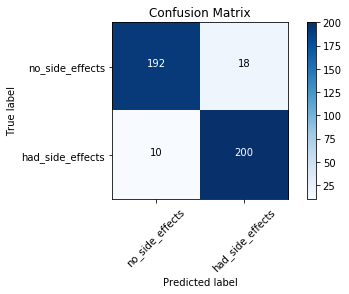

In [47]:
#Next, we define the labels for the confusion matrix. In our case, the labels are
#titled “no side effects” and “had side effects.”

cm_plot_labels = ['no_side_effects','had_side_effects']
#Lastly, we plot the confusion matrix by using the plot_confusion_matrix() function we just discussed. To this function, we pass in the confusion matrix cm and the labels cm_plot_labels, as well as a 
#title for the confusion matrix.

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Blue cells are the values we correctly predicted and white cells are the values we incorrectly predicted

In [48]:
cm

array([[192,  18],
       [ 10, 200]], dtype=int64)

# Save and Load a Keras Model

If we want to use the model in future with the same weights and architecture, built over the training process, we can save the model and we can use it later

<strong>model.save</strong>

In [49]:
model.save('medical_trial_model.h5')

<pre>
This save function saves-:

1) The architecture of the model, allowing to re-create the model
2) The weights of the model
3) The training configuration(loss,optimizer)
4) The state of the optimizer, allowing you to resume the training process from where you left off
</pre>

In [51]:
from keras.models import load_model
new_model=load_model('medical_trial_model.h5')

In [52]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [54]:
new_model.get_weights()
#The weights the model set so far

[array([[-0.52513313, -0.06403214, -0.42532367, -0.53186136,  0.4752152 ,
         -0.21825406, -0.4276663 ,  0.47233787, -0.4697077 , -0.51248574,
         -0.36972874, -0.5785965 , -0.09544146,  0.8283183 ,  0.6406252 ,
         -0.33129665]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        , -0.1587474 ,
         0.        ,  0.        , -0.15050624,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.09724746, -0.10644642,
         0.        ], dtype=float32),
 array([[-5.45091033e-02, -2.97082961e-02, -1.95559606e-01,
         -3.08921814e-01,  3.17562431e-01,  8.62574875e-02,
          1.88931078e-01,  3.23553234e-01, -1.39283285e-01,
         -1.15792453e-02,  3.38261336e-01,  5.07991612e-02,
         -3.30357879e-01, -2.80707359e-01, -2.84600973e-01,
         -1.90535694e-01, -3.76456380e-02,  1.05437666e-01,
         -8.99758935e-03, -7.22643137e-02, -7.89734125e-02,
         -1.01024717e-01, -3.36796045e-01, -9.81638134e-02,
 

In [58]:
new_model.optimizer
#the optimizer we used during the training process

<strong>model.to_json</strong>

It is used to only save the architecture of the model, not its weights, not optimizer, and not even the configurations

In [60]:
model_json=model.to_json()

In [61]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "act

In [62]:
from keras.models import model_from_json

In [63]:
model_architecture=model_from_json(model_json)

In [64]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


<strong>model.save_weights</strong>

This is used when you only want to save weights, not architecture, no config, no optimizer

In [65]:
model.save_weights('model_weights.h5')

In [66]:
model_architecture.get_weights()

[array([[ 0.15224195, -0.34289882,  0.26485646,  0.5540528 ,  0.5200989 ,
         -0.1208221 , -0.45780313,  0.22162074,  0.23141682, -0.07320654,
         -0.37413153,  0.17797214, -0.21301177,  0.5613159 ,  0.13393444,
          0.1879701 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 0.16687039, -0.21180418,  0.23441604,  0.28401503, -0.02426797,
          0.0610407 ,  0.28079328, -0.31172904, -0.2014116 ,  0.190173  ,
         -0.30432335, -0.31914884,  0.24386767,  0.1288929 ,  0.02695855,
         -0.23840457, -0.15144198, -0.10793757,  0.11788163,  0.00296932,
         -0.24500602,  0.06717145,  0.12187055, -0.27061084, -0.25867635,
          0.03742826, -0.2392041 , -0.0659014 ,  0.1642907 ,  0.10478938,
         -0.32916233,  0.3393084 ],
        [ 0.3312072 , -0.2758469 ,  0.28924075, -0.30085203,  0.2118788 ,
         -0.07148972, -0.0566805 ,  0.18018249,  0.05202025,  0.07507551,
          0.00

In [67]:
model_architecture.load_weights('model_weights.h5')

In [69]:
model_architecture.get_weights()

[array([[-0.52513313, -0.06403214, -0.42532367, -0.53186136,  0.4752152 ,
         -0.21825406, -0.4276663 ,  0.47233787, -0.4697077 , -0.51248574,
         -0.36972874, -0.5785965 , -0.09544146,  0.8283183 ,  0.6406252 ,
         -0.33129665]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        , -0.1587474 ,
         0.        ,  0.        , -0.15050624,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.09724746, -0.10644642,
         0.        ], dtype=float32),
 array([[-5.45091033e-02, -2.97082961e-02, -1.95559606e-01,
         -3.08921814e-01,  3.17562431e-01,  8.62574875e-02,
          1.88931078e-01,  3.23553234e-01, -1.39283285e-01,
         -1.15792453e-02,  3.38261336e-01,  5.07991612e-02,
         -3.30357879e-01, -2.80707359e-01, -2.84600973e-01,
         -1.90535694e-01, -3.76456380e-02,  1.05437666e-01,
         -8.99758935e-03, -7.22643137e-02, -7.89734125e-02,
         -1.01024717e-01, -3.36796045e-01, -9.81638134e-02,
 

So in this way if you have stored the model architecture, you can load the same weights to your model